# Descriptive Statistics
<hr style="border:2px solid black">

<img src='descriptive_stats.png' width=600>

## 1. Overview

### Population

- the whole group of people, items, or element of interest
- usually too large and expensive to study in their entirety
- `parameter`: characteric value of a population

### Sample

- a subset of the population one selects for a study
- studying sample data can be more efficient and cost-effective
- `statistic`: characteric value of a sample

### Random Variable

- a variable that takes values randomly from a given list or range
- may represent the input or output data of a statistical model
- can be described by a probability distribution function that assigns a probability to each possible outcome

### Categorical Variable

- values or labels that do not follow a natural ordering
- example: 
    + gender
    + season of the year

### Ordinal Variable

- have values that follow a natural order, but the difference between two values is not measurable
- example: 
    + movie ratings (5 stars, …, 1 star)
    + evaluation (‘very good’, ‘good’, …, ‘awful’)

### Metric Variable

- values have natural ordering and the distance between two values is interpretable
- example: 
    + height in cm
    + price in $

### Discrete Variable

- have a finite number of possible values
- ordinal and categorical variables are always discrete
- metric variables can often be discrete
- example:
    + number of books delivered by Amazon each day
    + movie ratings (5 stars, …, 1 star)

### Continuous Variable

- metric variables having no minimum distance between values
examples:
    + Unix Time (measured in number of seconds since 1970)
    + height (in cm)

### Descriptive Statistics

- aims to describe a given dataset visually and through metrics 
- crucial step in exploratory analysis that gives better feeling for the data and its characteristics

|type| what it is|
|:--:|:--:|
|Frequency Distribution|shows the count, percent, or frequency of different outcomes occurring in dataset|
|Central Tendency|single-value summary of a dataset using that reflects the center of its distribution|
|Dispersion| a measure of variability, like the range, variance, or standard deviation of dataset|

### Inferential Statistics

- aims to draw conclusions / make generalizations about a population by examining random samples
- accuracy depends largely on how well sample data represents the population

|type|what it is|
|:--:|:--:|
|Regression Analysis|show the relationship between a set of independent variables and a dependent variable|
|Hypothesis Testing|access whether relationships observed in sample data actually exist in the population|
|Confidence Intervals|takes sampling error into account to suggest a range of values for an actual population parameter|

### Measures of Central Tendency

- `mean`: for metric variables
- `median` and `quantiles`: for ordinal or metric variables
- `mode`: for ordinal or categorical variables

### Measures of Dispersion

- `variance`: for metric variables
- `standard deviation`: for metric variables
- `frequency table`: for categorical or nominal variables

### Descriptive statistics for two variables

- `Pearson correlation`: for metric variables
- `contingency table` and `Cramer correlation`: for ordinal or categorical variables

<hr style="border:2px solid black">

## 2. Example: Penguin Dataset 

**load packages**

In [115]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

**read data**

In [116]:
df = pd.read_csv('../data/penguins_simple.csv', sep=';')

**show data head**

In [117]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


**check dataframe shape**

In [118]:
df.shape

(333, 6)

**dataframe columns**

In [119]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

**dataframe summary**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              333 non-null    object 
 1   Culmen Length (mm)   333 non-null    float64
 2   Culmen Depth (mm)    333 non-null    float64
 3   Flipper Length (mm)  333 non-null    float64
 4   Body Mass (g)        333 non-null    float64
 5   Sex                  333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 15.7+ KB


**Q: What are the variable types?**

In [121]:
numerical_variables = [
    'bill_length',
    'bill_depthth',
    'flipper_length',
    'body_mass'
]
categorical_variables = [
    'species',
    'island',
    'sex'
]

In [122]:
## arithmetic mean
mean = df.mean()
mean

/tmp/ipykernel_24995/2152524925.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Culmen Length (mm)       43.992793
Culmen Depth (mm)        17.164865
Flipper Length (mm)     200.966967
Body Mass (g)          4207.057057
dtype: float64

In [123]:
## median
median = df.median()
median

/tmp/ipykernel_24995/2109127600.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


Culmen Length (mm)       44.5
Culmen Depth (mm)        17.3
Flipper Length (mm)     197.0
Body Mass (g)          4050.0
dtype: float64

In [124]:
df.max(numeric_only=True)

Culmen Length (mm)       59.6
Culmen Depth (mm)        21.5
Flipper Length (mm)     231.0
Body Mass (g)          6300.0
dtype: float64

In [154]:
df = df.rename(columns={'Culmen Length (mm)':'culmen_length_mm',
                    'Culmen Depth (mm)':'culmen_depth_mm',
                     'Flipper Length (mm)':'flipper_length_mm', 
                     'Body Mass (g)':'body_mass_g',})

In [155]:
## mode
df.mode(numeric_only=False)

,Species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Sex
0,Adelie,41.1,17.0,190.0,3800.0,MALE


In [156]:
## Variance
nandf = df.dropna()
df.culmen_length_mm.var()


29.906333441875603

In [158]:
## Standard Deviation
df.culmen_length_mm.std()

5.468668342647559

In [159]:
np.sqrt(df.culmen_length_mm.var())

5.468668342647559

In [160]:
## Range
df.culmen_length_mm.max() - df.culmen_length_mm.min()

27.5

In [161]:
# descriptive statistics for numerical features
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [163]:
## IQR
df.culmen_length_mm.quantile(0.75) - df.culmen_length_mm.quantile(0.25)

9.100000000000001

In [164]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [165]:
import scipy as sc
sc.stats.iqr(df.culmen_length_mm)

9.100000000000001

<Axes: >

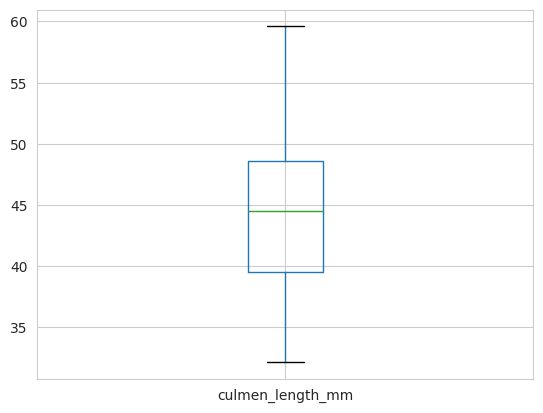

In [167]:
## Boxplot
df.boxplot('culmen_length_mm')

### Distributions 

#### Univariate distributions

Frequency table: `.value_counts()`

Histogram: `.hist()`


#### Multivariate distributions

Categorical and Ordinal Variables: `crosstab()`

Metric Variables: `corr()`

In [168]:
df.Sex.value_counts(normalize=True)

MALE      0.504505
FEMALE    0.495495
Name: Sex, dtype: float64

#### Look at histograms

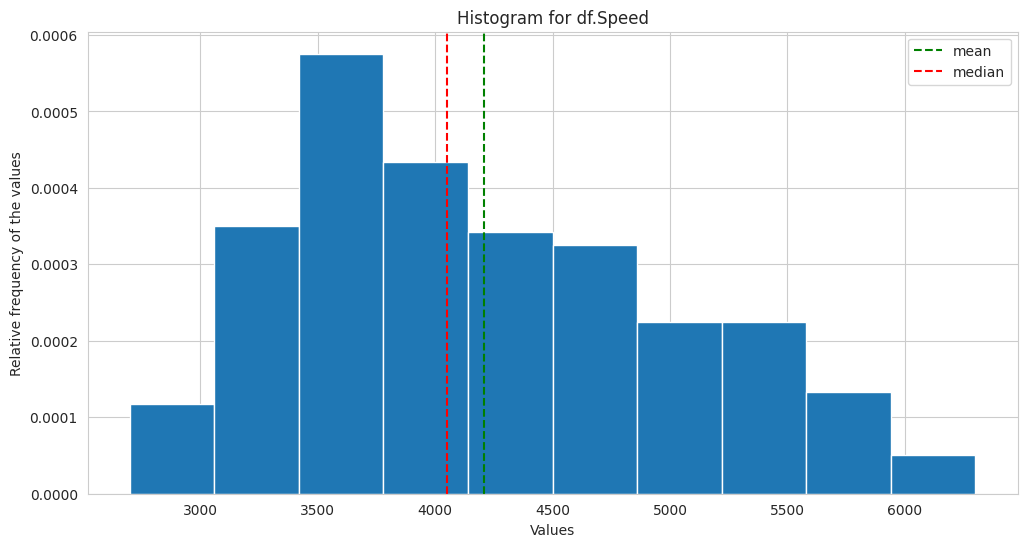

In [170]:
df.body_mass_g.hist(figsize=(12,6), density=True, bins=10)
plt.title('Histogram for df.Mass')
plt.xlabel('Values')
plt.ylabel('Relative frequency of the values')
plt.axvline(df.body_mass_g.mean(), c='g', linestyle='--', label='mean')
plt.axvline(df.body_mass_g.median(), c='r', linestyle='--', label='median')
plt.legend()
plt.show()

In [171]:
df

,Species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


In [173]:
# Crosstab
pd.crosstab(df.body_mass_g, df.flipper_length_mm, normalize='all', margins=True)

flipper_length_mm,172.0,174.0,176.0,178.0,180.0,181.0,182.0,183.0,184.0,185.0,...,222.0,223.0,224.0,225.0,226.0,228.0,229.0,230.0,231.0,All
body_mass_g,,,,,,,,,,,,,,,,,,,,,
2700.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003003
2850.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003003,0.000000,0.000000,0.003003,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006006
2900.0,0.000000,0.000000,0.000000,0.003003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012012
2925.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003003
3000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003003,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003003,0.000000,0.000000,0.000000,0.000000,0.003003,0.000000,0.000000,0.006006
6000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006006
6050.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003003,0.000000,0.003003


In [180]:
crosstab_data = pd.crosstab(df.Species, df.flipper_length_mm)

<Axes: xlabel='flipper_length_mm', ylabel='Species'>

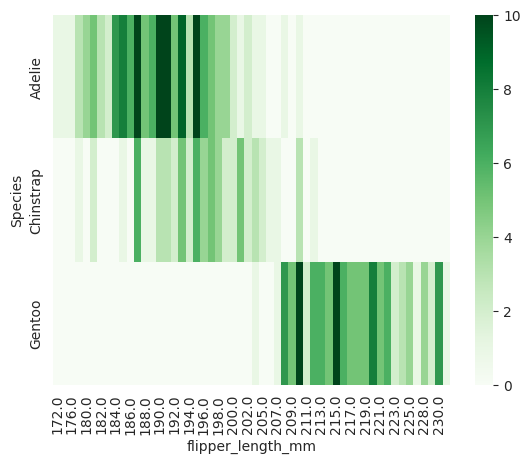

In [181]:
sns.heatmap(crosstab_data, cmap='Greens', robust=True)

flipper_length_mm  172.0  174.0  176.0  178.0  180.0  181.0  182.0  183.0  \
body_mass_g                                                                 
2700.0                 0      0      0      0      0      0      0      0   
2850.0                 0      0      0      0      0      1      0      0   
2900.0                 0      0      0      1      0      0      0      0   
2925.0                 0      0      0      0      0      0      0      0   
3000.0                 0      0      0      0      0      0      0      0   
...                  ...    ...    ...    ...    ...    ...    ...    ...   
5850.0                 0      0      0      0      0      0      0      0   
5950.0                 0      0      0      0      0      0      0      0   
6000.0                 0      0      0      0      0      0      0      0   
6050.0                 0      0      0      0      0      0      0      0   
6300.0                 0      0      0      0      0      0      0      0   

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

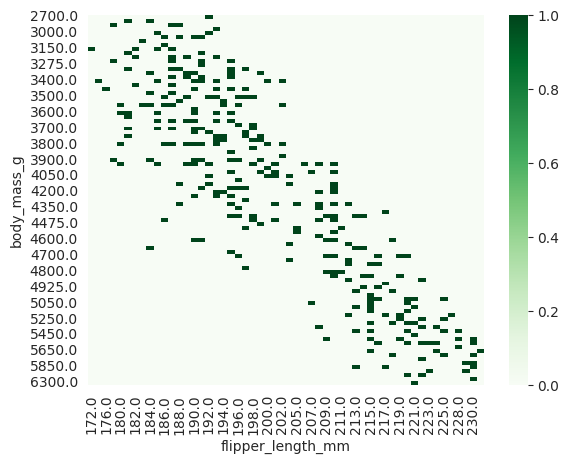

In [189]:
crosstab_data = pd.crosstab(df.body_mass_g, df.flipper_length_mm)
print(crosstab_data)
sns.heatmap(crosstab_data, cmap='Greens', robust=True)

### Correlations

In [191]:
correlations = df.corr()
correlations

/tmp/ipykernel_24995/1208974867.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

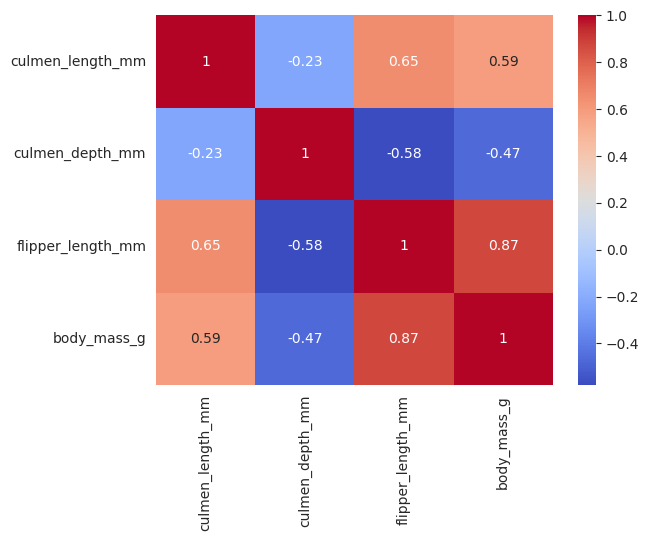

In [197]:
sns.heatmap(correlations, annot=True, cmap='coolwarm') 


<hr style="border:2px solid black">

## References

- [Population vs Sample: Uses and Examples](https://statisticsbyjim.com/basics/population-vs-sample/)
- [Descriptive vs. Inferential Statistics: Key Differences and Measurement Techniques](https://www.simplilearn.com/difference-between-descriptive-inferential-statistics-article)
- [YouTube video series on Descriptive Statistics](https://www.youtube.com/playlist?list=PLTNMv857s9WVStKLco6ZBOsfSGXzJ1L0f)
- [Introduction to Statistics: An Intuitive Guide for Analyzing Data and Unlocking Discoveries](https://www.amazon.de/-/en/Jim-Frost/dp/1735431109)

In [205]:
pip install mathplotlib.pyplot

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement mathplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for mathplotlib.pyplot
Note: you may need to restart the kernel to use updated packages.


In [204]:
import plotly.graph_objects as go
# Visualize correlations
fig = go.Figure(
    go.Bar(
        x=correlations.columns,
        y=correlations.index,
        orientation="h",
        marker=dict(
            colorscale="Viridis",
        ),
    )
)

fig.show()